In [ ]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [54]:
dfp = pd.read_csv("Phones_accelerometer.csv")
dfw = pd.read_csv("Watch_accelerometer.csv")

In [55]:
dfp.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [56]:
dfw.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,a,gear,gear_1,stand
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,a,gear,gear_1,stand
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,a,gear,gear_1,stand
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,a,gear,gear_1,stand
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,a,gear,gear_1,stand


In [57]:
def label_activity(row):
    if row['gt'] == "walk":
      return 1
    elif row['gt'] == "sit":
      return 2
    elif row['gt'] == "stand":
      return 3
    elif row['gt'] == "bike":
      return 4
    elif row['gt'] == "stairsup":
      return 5
    elif row['gt'] == "stairsdown":
      return 6
    else:
        return 0

In [58]:
dfp['gt'] = dfp.apply(lambda row: label_activity(row), axis = 1)

In [59]:
dfp.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,3
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,3
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,3
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,3
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,3


In [60]:
dfp = dfp.drop(['Index','Arrival_Time', 'Creation_Time', 'User', 'Model', 'Device'], axis = 1)

In [61]:
dfp.shape

(13062475, 4)

In [62]:
dfp = dfp.sample(frac = 0.05, random_state = 1)
dfp.shape

(653124, 4)

''

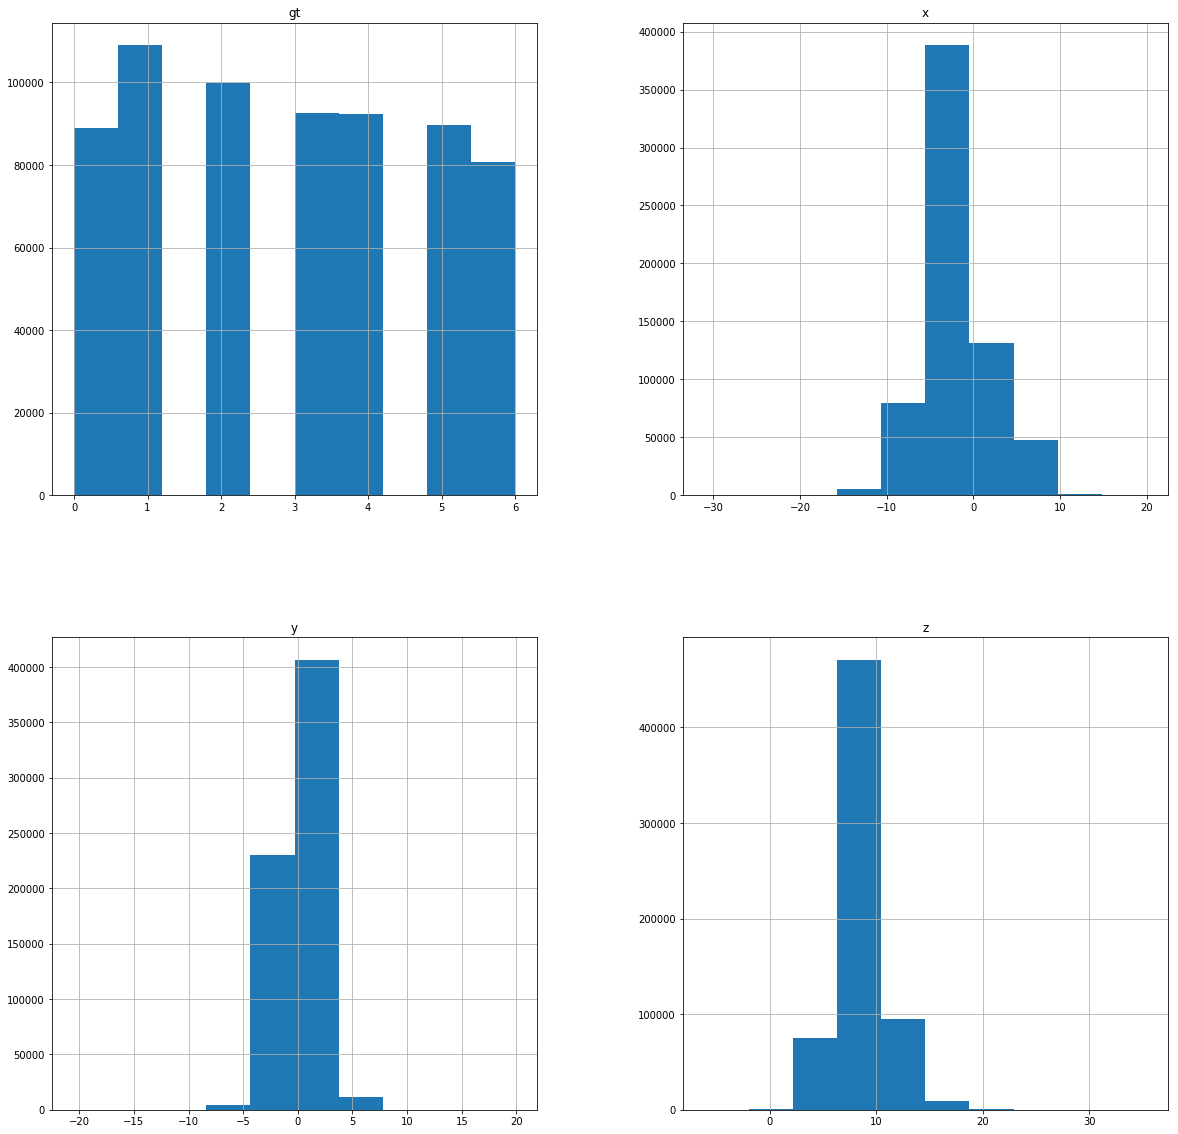

In [63]:
hist = dfp.hist(figsize = (20,20))
hist
;

In [64]:
dfp.head()

,x,y,z,gt
12592762,0.651223,-0.766145,9.442732,4
6343595,-2.355895,0.000000,9.433155,3
5487719,3.217767,0.612908,9.500074,2
10020473,-0.153227,1.225816,8.274258,4
9179976,-2.030411,2.347626,9.988266,6


In [65]:
inputs = dfp.drop('gt', axis = 1)
target = dfp['gt']

In [88]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn import preprocessing

In [89]:
inputs = preprocessing.scale(inputs)
target = target.astype('int')

In [90]:
model = tree.DecisionTreeClassifier()

In [91]:
model.fit(inputs,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
model.score(inputs,target)

0.973576227485133

In [93]:
x_var = dfp['x']
y_var = dfp['y']
z_var = dfp['z']

In [94]:
from mpl_toolkits.mplot3d import Axes3D

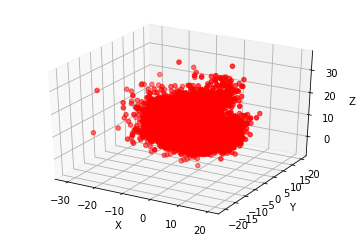

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_var,y_var,z_var, c = 'r',marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [98]:
y_pred = model.predict(inputs)
print("Confusion matrix: \n", confusion_matrix(target, y_pred))
print("Accuracy score: \n", accuracy_score(target,y_pred))
print(classification_report(target,y_pred))

Confusion matrix: 
 [[ 86413    157    633    871    499    183     95]
 [  1328 106930     20    184    315    160    110]
 [   209      8  99564     12      9      1      1]
 [   556     94     55  91582    167     24     12]
 [  1715    925    149    767  88639    107     90]
 [  1266    970     23    349    855  86225     93]
 [  1112   1116     18    292    968    740  76513]]
Accuracy score: 
 0.973576227485133
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     88851
          1       0.97      0.98      0.98    109047
          2       0.99      1.00      0.99     99804
          3       0.97      0.99      0.98     92490
          4       0.97      0.96      0.96     92392
          5       0.99      0.96      0.97     89781
          6       0.99      0.95      0.97     80759

avg / total       0.97      0.97      0.97    653124

